['Japan' 'Singapore' 'South Korea' 'HK SAR']
['South Korea']
['Taiwan']
asd
0 alpha
1 anglit
2 betaprime
3 bradford
4 burr
5 cauchy
6 chi2
7 cosine
8 erlang
9 expon
10 exponnorm
11 exponweib
12 f
13 fatiguelife
14 fisk
15 foldcauchy
16 foldnorm
17 frechet_r
18 frechet_l
19 genlogistic
20 genpareto
21 gennorm
22 genexpon
23 genextreme
24 gausshyper
25 gamma
26 gengamma
27 genhalflogistic
28 gilbrat
29 gompertz
30 gumbel_r
31 gumbel_l
32 halfcauchy
33 halflogistic
34 halfnorm
35 halfgennorm
36 hypsecant
37 invgamma
38 invgauss
39 invweibull
40 johnsonsu
41 ksone
42 kstwobign
43 levy
44 levy_l
45 loggamma
46 loglaplace
47 lognorm
48 lomax
49 maxwell
50 mielke
51 ncf
52 nct
53 norm
54 pareto
55 pearson3
56 powerlognorm
57 powernorm
58 reciprocal
59 rayleigh
60 rice
61 recipinvgauss
62 semicircular
63 t
64 triang
65 truncexpon
66 truncnorm
67 tukeylambda
68 uniform
69 vonmises
70 vonmises_line
71 wald
72 weibull_min
73 weibull_max
74 wrapcauchy
gausshyper (0.7735602018122537, 2.997783801935

c:\users\thinkstation\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
c:\users\thinkstation\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


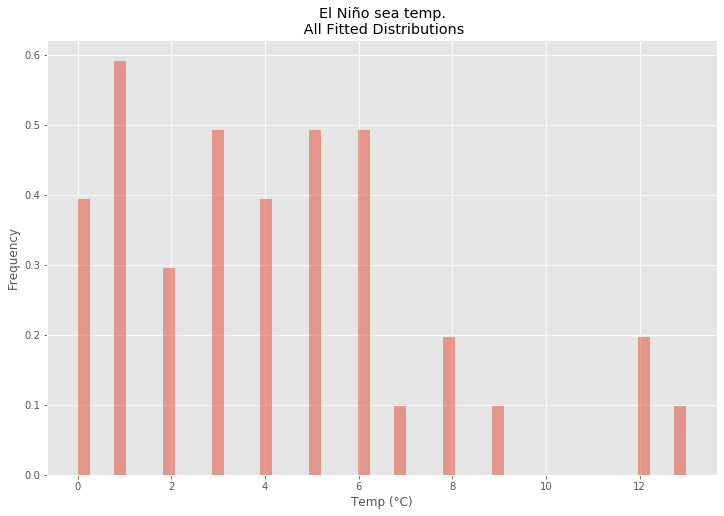

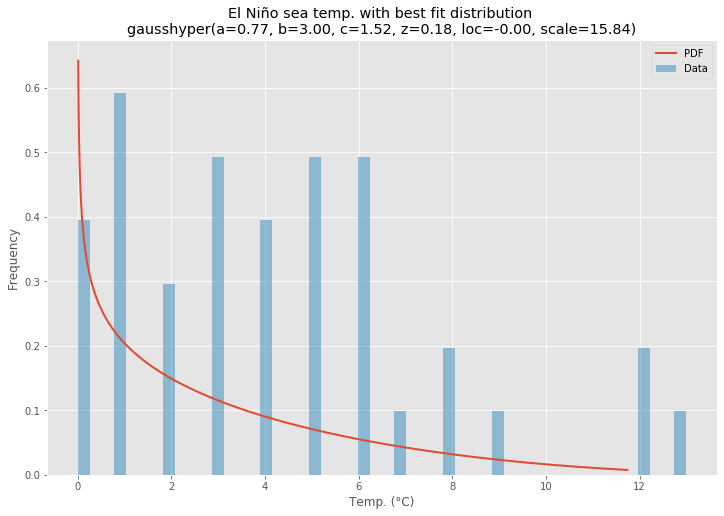

In [11]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime

def days_between(d1, d2):
    d1 = d1.strftime("%Y-%m-%d")
    d2 = d2.strftime("%Y-%m-%d")
    return abs((d2 - d1).days)

cols1 = ['country','age','date_hospitalised','date_death','date_recovered','date_onset','date_first_consultation']
cols2 = ['sex','birth_year','country','exposure_start','confirmed_date','released_date','deceased_date']
cols3 = ['Age','Gender','Nationality','Symptomatic ToConfirmation','Days ToRecover']
cols1_rename = ['country','age','hospit_date','death_date','rec_date','onset_date','confirm_date']
cols2_rename = ['sex', 'birth_year', 'country', 'exposure_start','confirm_date','releas_date','decease_date']
cols3_rename = ['age', 'sex', 'country', 'sympt_to_confirm', 'confirm_to_release']

data1 = pd.read_csv(r"data/subset_international_cases_2020_03_11.csv", usecols=cols1)
data2 = pd.read_csv(r"data/patients.csv", usecols=cols2)
data3 = pd.read_csv(r"data/data (30).csv", usecols=cols3)

data1 = data1.rename(columns={k:v for k,v in zip(cols1,cols1_rename)})
data2 = data2.rename(columns={k:v for k,v in zip(cols2,cols2_rename)})
data3 = data3.rename(columns={k:v for k,v in zip(cols3,cols3_rename)})
cols1 = cols1_rename
cols2 = cols2_rename
cols3 = cols3_rename

# data 1
for col in cols1[2:]:
    data1[col] = pd.to_datetime(data1[col], format='%d/%m/%Y')
    
data1['onset_to_confirm'] = (data1['confirm_date']-data1['onset_date']).dt.days
data1['hospit_to_decease'] = (data1['death_date']-data1['hospit_date']).dt.days
data1['hospit_to_release'] = (data1['rec_date']-data1['hospit_date']).dt.days
data1 = data1.drop(columns=['hospit_date', 'death_date', 'rec_date', 'onset_date', 'confirm_date'])
data1.loc[data1['hospit_to_decease'].notna()]

# data 2
data2['age'] = 2020 - data2['birth_year']
for col in cols2[3:]:
    data2[col] = pd.to_datetime(data2[col])
data2['expose_to_confirm'] = (data2['confirm_date']-data2['exposure_start']).dt.days
data2['confirm_to_release'] = (data2['releas_date']-data2['confirm_date']).dt.days
data2['confirm_to_decease'] = (data2['decease_date']-data2['confirm_date']).dt.days
data2 = data2.drop(columns=['birth_year', 'exposure_start', 'confirm_date', 'confirm_date', 'releas_date', 'decease_date'])
data2 = data2.loc[data2['country'] == 'Korea']
data2 = data2.replace('Korea', 'South Korea')

# data 3
data3 = data3.loc[data3['country'] == 'Taiwanese']  # in Taiwan: confirm = hospital
data3 = data3.replace('Taiwanese', 'Taiwan')
data3['sex'] = data3['sex'].str.lower()

print(data1['country'].unique())
print(data2['country'].unique())
print(data3['country'].unique())

data1 = data1.loc[data1['onset_to_confirm'].notna()]      # 173 cases
# data1 = data1.loc[data1['hospit_to_release'].notna()]     # 51 cases
# data1 = data1.loc[data1['hospit_to_decease'].notna()]     # only 6 cases

data2 = data2.loc[data2['expose_to_confirm'].notna()]     # 352 cases
# data2 = data2.loc[data2['confirm_to_release'].notna()]    # 50 cases   # in Taiwan: confirm = hospital
# data2 = data2.loc[data2['confirm_to_decease'].notna()]    # 35 cases

data3 = data3.loc[data3['sympt_to_confirm'].notna()]      # 275 cases
# data3 = data3.loc[data3['confirm_to_release'].notna()]    # only 9 cases  # otherwise isolated

data2 = data2.loc[data2['expose_to_confirm'] >= 0]
# [(0,25),(25,40),(40,60),(60,70),(70,200)]
age_group = (0,25)
data2 = data2['expose_to_confirm'].loc[(data2['age'] > age_group[0]) & (data2['age'] < age_group[1])]


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=20, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi2,st.cosine,
        st.erlang,st.expon,st.exponnorm,st.exponweib,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsu,st.ksone,st.kstwobign,st.levy,st.levy_l,st.loggamma,
        st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlognorm,st.powernorm,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for j, distribution in enumerate(DISTRIBUTIONS):
        print(j, distribution.name)
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            print('ajao')
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

print('asd')
# Load data from statsmodels datasets
data = data2
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)
print(best_fit_name,best_fit_params,best_dist)

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

plt.show()
